# DATA SCIENCE CAPSTONE PROJECT

The purpose of this notebook is to predict the severity of accidents in the Seattle Area using weather (raining, overcast, etc), road conditions (wet,dry,ice,etc) and light condition (daylight,dusk,etc)

Loading some useful libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt

Loading the dataset

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Size of the data set

In [3]:
df.shape

(194673, 38)

Selecting only some useful features

In [4]:
acc_df = df[['INCDATE','SEVERITYCODE','SPEEDING','WEATHER','ROADCOND','LIGHTCOND']]
acc_df.head()

,INCDATE,SEVERITYCODE,SPEEDING,WEATHER,ROADCOND,LIGHTCOND
0,2013/03/27 00:00:00+00,2,NaN,Overcast,Wet,Daylight
1,2006/12/20 00:00:00+00,1,NaN,Raining,Wet,Dark - Street Lights On
2,2004/11/18 00:00:00+00,1,NaN,Overcast,Dry,Daylight
3,2013/03/29 00:00:00+00,1,NaN,Clear,Dry,Daylight
4,2004/01/28 00:00:00+00,2,NaN,Raining,Wet,Daylight


# Data Preparation

It is apparent that there are some NaNs in the data , however in the attribute speeding this means the car was not overspeeding. To get a global view of all null entries, a heatmap is used. 

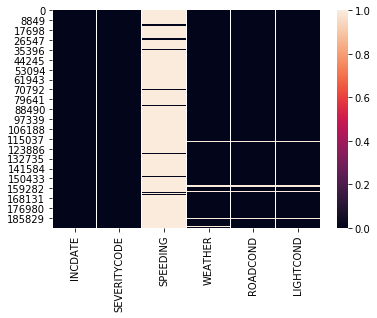

In [5]:
sns.heatmap(acc_df.isnull())

The regions indicated in brown has null entries. We delete these entries but for the SPEEDING attribute we replace NaN 

In [6]:
acc_df['SPEEDING'] = acc_df['SPEEDING'].fillna('N')
# simply drop whole row with NaN in "price" column
acc_df.dropna(subset=["LIGHTCOND","ROADCOND","WEATHER"], axis=0, inplace=True)

# reset index, because we droped two rows
acc_df.reset_index(drop=True, inplace=True)
print("The number of rows dropped from the data set is:", 194673-len(acc_df))
print(acc_df.shape)

The number of rows dropped from the data set is: 5336
(189337, 6)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Checking if the dataset if null value free

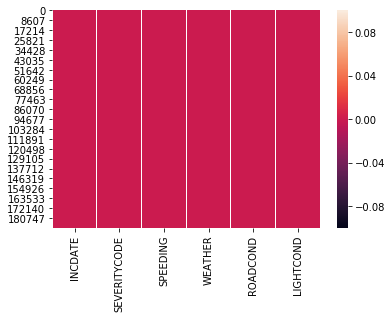

In [7]:
sns.heatmap(acc_df.isnull())


# Exploratory data analysis

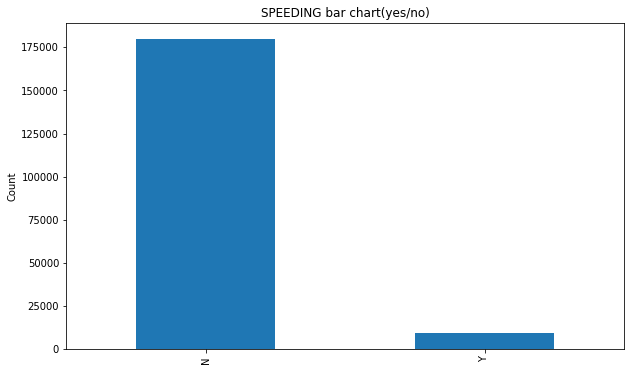

In [8]:
acc_df['SPEEDING'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Count') # add y-label to the plot
plt.title('SPEEDING bar chart(yes/no)') # add title to the plot
plt.show()

This showws that generally Seattle citizens are law abiding and dont Speed

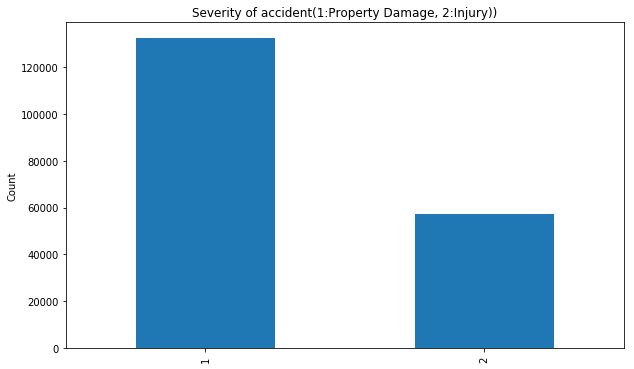

In [9]:
acc_df['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Count') # add y-label to the plot
plt.title('Severity of accident(1:Property Damage, 2:Injury))') # add title to the plot
plt.show()

An assesment is also made to see if there is any relationship between day of the week, accident count and severity code 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


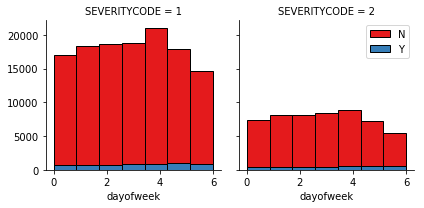

In [10]:
acc_df['INCDATE'] = pd.to_datetime(acc_df['INCDATE'])
acc_df['dayofweek'] = acc_df['INCDATE'].dt.dayofweek
bins = np.linspace(acc_df.dayofweek.min(), acc_df.dayofweek.max(), 8)
g = sns.FacetGrid(acc_df, col="SEVERITYCODE", hue="SPEEDING", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek' , bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

There is no relationship between day of the week and accident count. However it semms like there is more cars that are overspeeding that cause proerty damage than those that cause injury

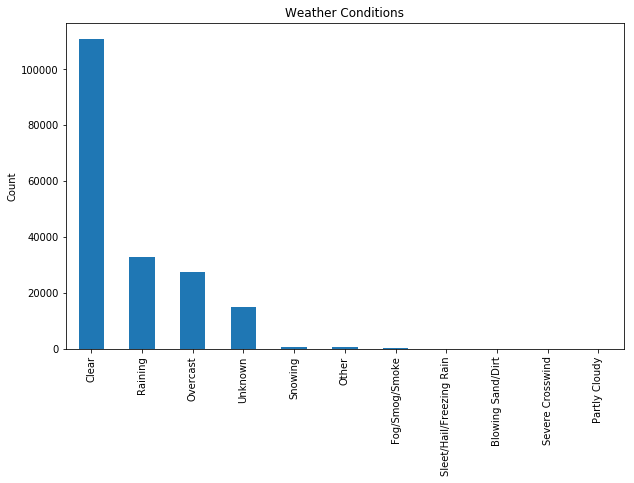

In [11]:
acc_df['WEATHER'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Count') # add y-label to the plot
plt.title('Weather Conditions') # add title to the plot
plt.show()

It is apparent that the weather is mostly clear

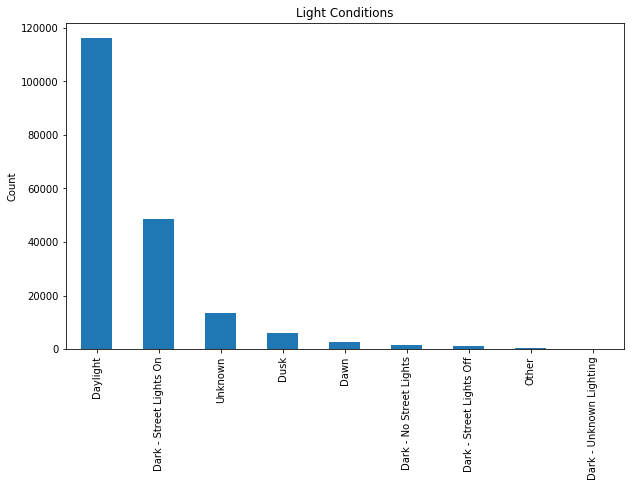

In [12]:
acc_df['LIGHTCOND'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Count') # add y-label to the plot
plt.title('Light Conditions') # add title to the plot
plt.show()

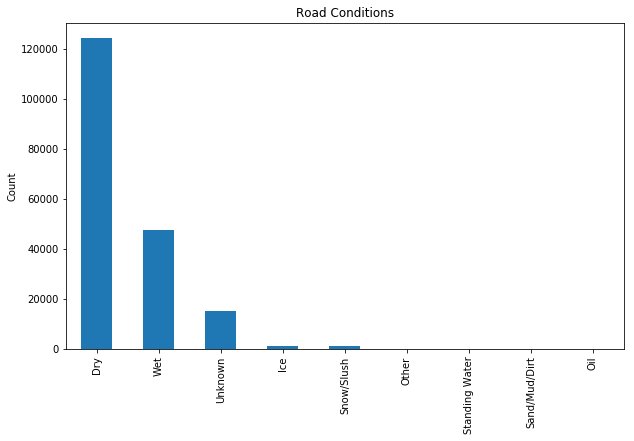

In [13]:
acc_df['ROADCOND'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Count') # add y-label to the plot
plt.title('Road Conditions') # add title to the plot
plt.show()

It is obvious that the weather is coupled with the light and road conditions 

It is also observed that the LIGHTCOND, WEATHER AND ROADCOND has "unknown and other" as attributes. These will be dropped

# Further Preprocessing

Now we drop incident date (INCDATE) and SPEEDING since these features will not be used for the prediction

In [14]:
acc_df.drop("INCDATE", axis = 1, inplace=True)
acc_df.drop("SPEEDING", axis = 1, inplace=True)
acc_df.drop("dayofweek", axis = 1, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
acc_df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


The features with the exception of the target feature are categorical therefore we use the onhot encoding technique to convert it to binary

In [16]:
acc_df1 = acc_df[["SEVERITYCODE"]]
acc_df1 = pd.concat([acc_df1,pd.get_dummies(acc_df['WEATHER'])], axis=1)
acc_df1 = pd.concat([acc_df1,pd.get_dummies(acc_df['ROADCOND'])], axis=1)
acc_df1 = pd.concat([acc_df1,pd.get_dummies(acc_df['LIGHTCOND'])], axis=1)
acc_df1.head()

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


Now drop the new feature "other" and "unknown"

In [17]:
acc_df1.drop("Other", axis = 1, inplace=True)
acc_df1.drop("Unknown", axis = 1, inplace=True)

We now assess if the dataset is nalanced by using the the target feature; SEVERITYCODE

In [18]:
acc_df1['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

Clearly the Dataset is not balanced therefore we resample the the dataset

In [19]:
from sklearn.utils import resample

acc_df_mj = acc_df1[acc_df1.SEVERITYCODE==1]
acc_df_mn = acc_df1[acc_df1.SEVERITYCODE==2]
acc_df_mj_dsample = resample(acc_df_mj,replace=False,n_samples=57052,random_state=10)
balanced_df=pd.concat([acc_df_mj_dsample,acc_df_mn])
balanced_df['SEVERITYCODE'].value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

Now we asses if the data makes sense by checking the correllation between the new feature

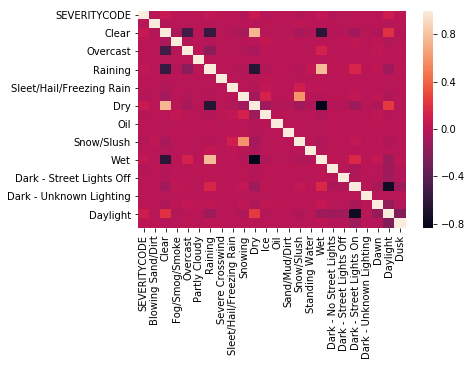

In [20]:
sns.heatmap(balanced_df.corr())

This data makes sense for example Raining is correlated with wet conditions and dark lighting onditions is not correlated with daylight. We can therefore go ahead with the study.

To use Scikit library we convert the dataset to arrays

In [21]:
y = balanced_df["SEVERITYCODE"].values
y[0:5]

array([1, 1, 1, 1, 1])

Dropping the target feature

In [22]:
balanced_df.drop("SEVERITYCODE", axis = 1, inplace=True)
balanced_df.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
49258,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
184569,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
119375,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
128465,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
48015,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [23]:
x = balanced_df.values
x[0:5]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0]], dtype=uint8)

# Data Normalization

In [24]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.70086305e-02,  8.19980521e-01, -5.45069782e-02,
        -4.16952134e-01, -5.92089246e-03, -4.70582529e-01,
        -9.81899056e-03, -2.35038911e-02, -6.46550144e-02,
         7.03322194e-01, -7.72566925e-02, -1.82521358e-02,
        -1.96408218e-02, -6.91489055e-02, -2.45983208e-02,
        -5.89333295e-01, -8.66841954e-02, -7.76574685e-02,
        -5.83881070e-01, -8.37355320e-03, -1.18077640e-01,
         7.64707642e-01, -1.82092492e-01],
       [-1.70086305e-02, -1.21954117e+00, -5.45069782e-02,
        -4.16952134e-01, -5.92089246e-03,  2.12502577e+00,
        -9.81899056e-03, -2.35038911e-02, -6.46550144e-02,
        -1.42182347e+00, -7.72566925e-02, -1.82521358e-02,
        -1.96408218e-02, -6.91489055e-02, -2.45983208e-02,
         1.69683269e+00,  1.15361283e+01, -7.76574685e-02,
        -5.83881070e-01, -8.37355320e-03, -1.18077640e-01,
        -1.30768930e+00, -1.82092492e-01],
       [-1.70086305e-02,  8.19980521e-01, -5.45069782e-02,
        -4.16952134e-01, -5.9

### Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91283, 23) (91283,)
Test set: (22821, 23) (22821,)


# Modelling

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
####
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.53827615, 0.54169405, 0.53332457, 0.52920556, 0.53455151,
       0.53354367, 0.53582227, 0.54296481, 0.54318391, 0.5427019 ,
       0.54274572, 0.54265808, 0.54200079, 0.54309627, 0.54945007,
       0.54949389, 0.5497568 , 0.55015118, 0.54936243, 0.55063319,
       0.55597914, 0.55098374, 0.55624206, 0.55102756, 0.55694317,
       0.55050173, 0.55129048, 0.54892424, 0.55242978, 0.54857368,
       0.55072083, 0.54221989, 0.5513343 , 0.54436703, 0.54401648,
       0.54331537, 0.5449805 , 0.5451996 , 0.54524342])

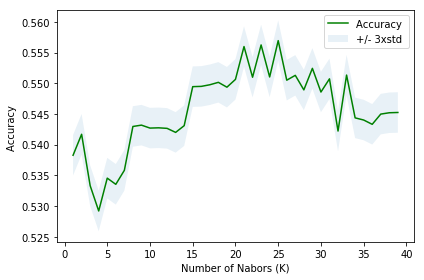

In [27]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.5569431663818413 with k= 25


In [29]:
k = mean_acc.argmax()+1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#######
#predicting
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])
########
#Accuracy Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
#########
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

[1 1 1 1 1]
[2 2 2 1 1]
Train set Accuracy:  0.5555470350448605
Test set Accuracy:  0.5569431663818413
Avg F1-score: 0.5415
Jaccard score: 0.5569


## Decision Tree

In [30]:
#####Modeling
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
loanTree.fit(X_train,y_train)
predTree = loanTree.predict(X_test)

print (predTree [0:5])
print (y_test [0:5])
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

print("Avg F1-score: %.4f" % f1_score(y_test, predTree, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, predTree))

[1 1 1 1 1]
[2 2 2 1 1]
DecisionTrees's Accuracy:  0.5608869024144428
Avg F1-score: 0.5323
Jaccard score: 0.5609


## SVM

In [31]:
from sklearn import svm
lof = svm.SVC(kernel='rbf')
lof.fit(X_train, y_train) 
yhat3 = lof.predict(X_test)

print(yhat3[0:5])
print(y_test[0:5])
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[1 1 1 1 1]
[2 2 2 1 1]
Avg F1-score: 0.5316
Jaccard score: 0.5606


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True status')
    plt.xlabel('Predicted status')

              precision    recall  f1-score   support

           1       0.62      0.31      0.41     11383
           2       0.54      0.81      0.65     11438

   micro avg       0.56      0.56      0.56     22821
   macro avg       0.58      0.56      0.53     22821
weighted avg       0.58      0.56      0.53     22821

Normalized confusion matrix
[[0.31 0.69]
 [0.19 0.81]]


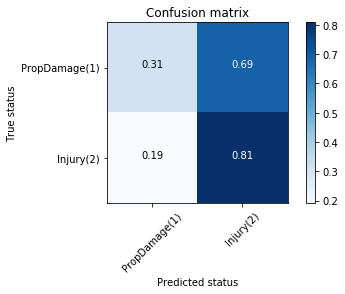

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PropDamage(1)','Injury(2)'],normalize= True,  title='Confusion matrix')


## LR

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat4 = LR.predict(X_test)
print(yhat4[0:5])
print(y_test[0:5])
print("Avg F1-score: %.4f"  % f1_score(y_test, yhat4, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat4))

[1 1 1 1 1]
[2 2 2 1 1]
Avg F1-score: 0.5312
Jaccard score: 0.5609


In [38]:
from sklearn.metrics import log_loss
y_pred_lr_proba=LR.predict_proba(x)
LR_log_loss=log_loss(y,y_pred_lr_proba)
LR_log_loss

0.6654804364953913

              precision    recall  f1-score   support

           1       0.62      0.31      0.41     11383
           2       0.54      0.81      0.65     11438

   micro avg       0.56      0.56      0.56     22821
   macro avg       0.58      0.56      0.53     22821
weighted avg       0.58      0.56      0.53     22821

Normalized confusion matrix
[[0.31 0.69]
 [0.19 0.81]]


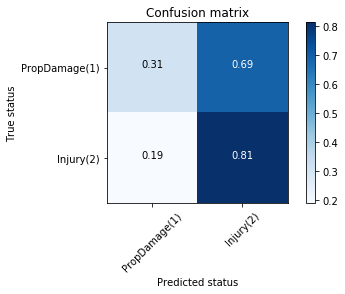

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat4, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat4))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PropDamage(1)','Injury(2)'],normalize= True, title='Confusion matrix')

## Results

Assessing the accuracy of the built models

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.5415       | 0.5569        | NA      |
| Decision Tree      | 0.5323       | 0.5609        | NA      |
| SVM                | 0.5316   | 0.5606        | NA      |
| LogisticRegression | 0.5312| 0.5609        | 0.6655 |

Plotting line chart

In [80]:
j = np.asarray([0.5415,0.5323,0.5316,0.5312])
f = np.asarray([0.5569,0.5609,0.5606,0.5609])
#avg = (j+f)
al= ['KNN','DT','SVM','LR']
avg = (j+f)/2


['KNN', 'DT', 'SVM', 'LR']

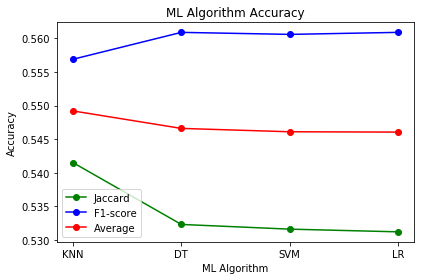

In [82]:
plt.plot(al,j,'go-')
plt.plot(al,f,'bo-')
plt.plot(al,avg,'ro-')
plt.legend(('Jaccard ', 'F1-score', 'Average'))
plt.ylabel('Accuracy')
plt.xlabel('ML Algorithm')
plt.title('ML Algorithm Accuracy')
plt.tight_layout()